In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import numpy as np
np.random.seed(1337)
import pandas

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
import pandas as pd

In [5]:
train= pd.read_csv('/kaggle/input/titanic/train.csv')
Test =  pd.read_csv('/kaggle/input/titanic/test.csv')

In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 1 - DATA ANALYSIS

# # Age

We begin by filling the n/a by mean age

In [8]:
train.Age = train.Age.fillna(int(train.Age.mean()))
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


If we consider the following age reprtion: (young: less than 18),(adult,between 18 and 55) and (Senior, above 55) we have the following about ages. We keep in mind that there is about 177 missing values, thus the statistics presented in the age section will consider these values

In [9]:
a,b,c=0,0,0
for i in train.Age:
    if i<18:
        a+=1
    elif i in range(18,56):
        b+=1
    else:
        c+=1
Age_rep = [a,b,c]
print("The percentage of Youths is:",a/len(train.Age-177),'\n',"The percentage of Adults is:",b/len(train.Age-177),'\n',"The percentage of Seniors is:",c/len(train.Age-177),'\n')

The percentage of Youths is: 0.12682379349046016 
 The percentage of Adults is: 0.8114478114478114 
 The percentage of Seniors is: 0.06172839506172839 



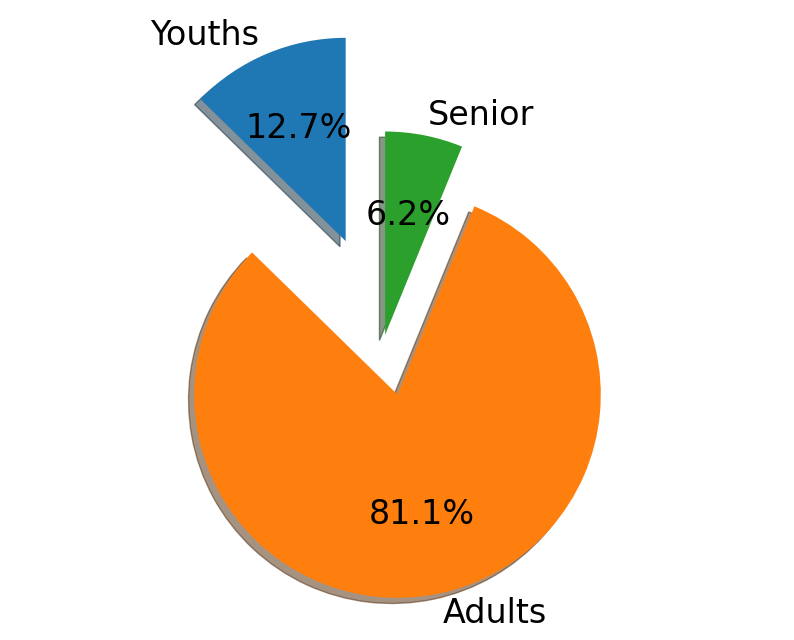

In [10]:
plt.figure(figsize=(10,8))
labels = ['Youths','Adults','Senior']
values= Age_rep
explode = [0.5,0.3,0]
#plt.title('Oganisation status',fontdict={'fontsize':34})
pie_org_status = plt.pie(values,labels=labels,startangle=90,explode=explode,textprops={'fontsize':24},autopct='%1.1f%%',shadow=True)  #autopct to specify the percentage needed
plt.axis('equal')
plt.show()

# # TRAVELING GROUPS

In [11]:
SibSps = sorted(train.groupby('SibSp').count().to_dict(orient='dict')['PassengerId'].items(), key=lambda x:x[1])
print(SibSps)

[(5, 5), (8, 7), (3, 16), (4, 18), (2, 28), (1, 209), (0, 608)]


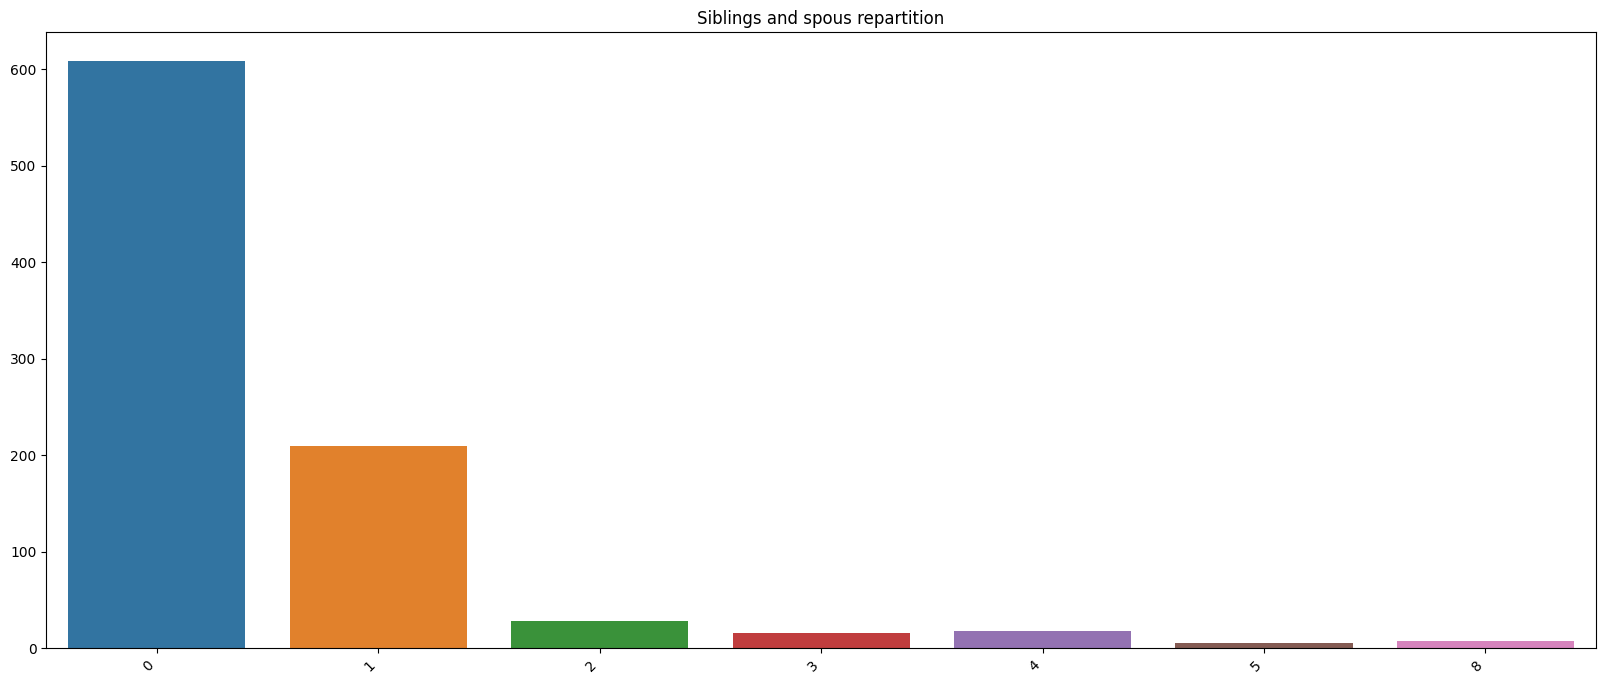

In [12]:
plt.figure(figsize=(20,8))
sns.barplot(x=list(dict(SibSps).keys()),y=list(dict(SibSps).values()))
plt.xticks(rotation=45, ha='right')
plt.title("Siblings and spous repartition")
plt.show()

In [13]:
Parchs = sorted(train.groupby('Parch').count().to_dict(orient='dict')['PassengerId'].items(), key=lambda x:x[1])
print(Parchs)

[(6, 1), (4, 4), (3, 5), (5, 5), (2, 80), (1, 118), (0, 678)]


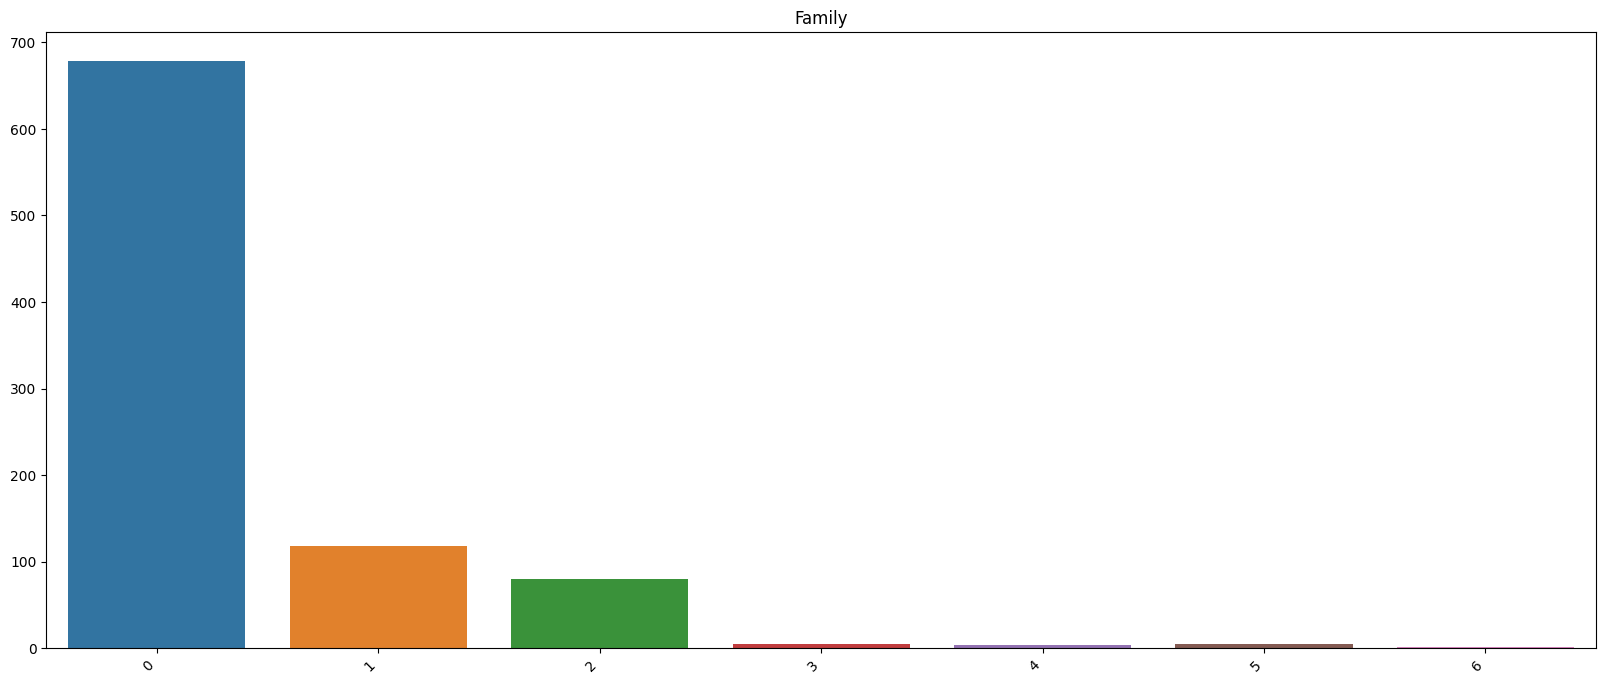

In [14]:
plt.figure(figsize=(20,8))
sns.barplot(x=list(dict(Parchs).keys()),y=list(dict(Parchs).values()))
plt.xticks(rotation=45, ha='right')
plt.title("Family")
plt.show()

THE TWO PREVIOUS GRAPH SIMPLY MEAN THAT PASENGER ON THE TITANIC WHERE MORE LIKELY TO TRAVEL ALONE. FOR THOSE WHO WERE TRAVELING AS A BINOME, THE CHANCEOF BEING A SPOUS OR SBIBLING WAS HIGHEST

## PORTS AND CLASSES 

In [15]:
EMB = sorted(train.groupby('Embarked').count().to_dict(orient='dict')['PassengerId'].items(), key=lambda x:x[1])
print(EMB)

[('Q', 77), ('C', 168), ('S', 644)]


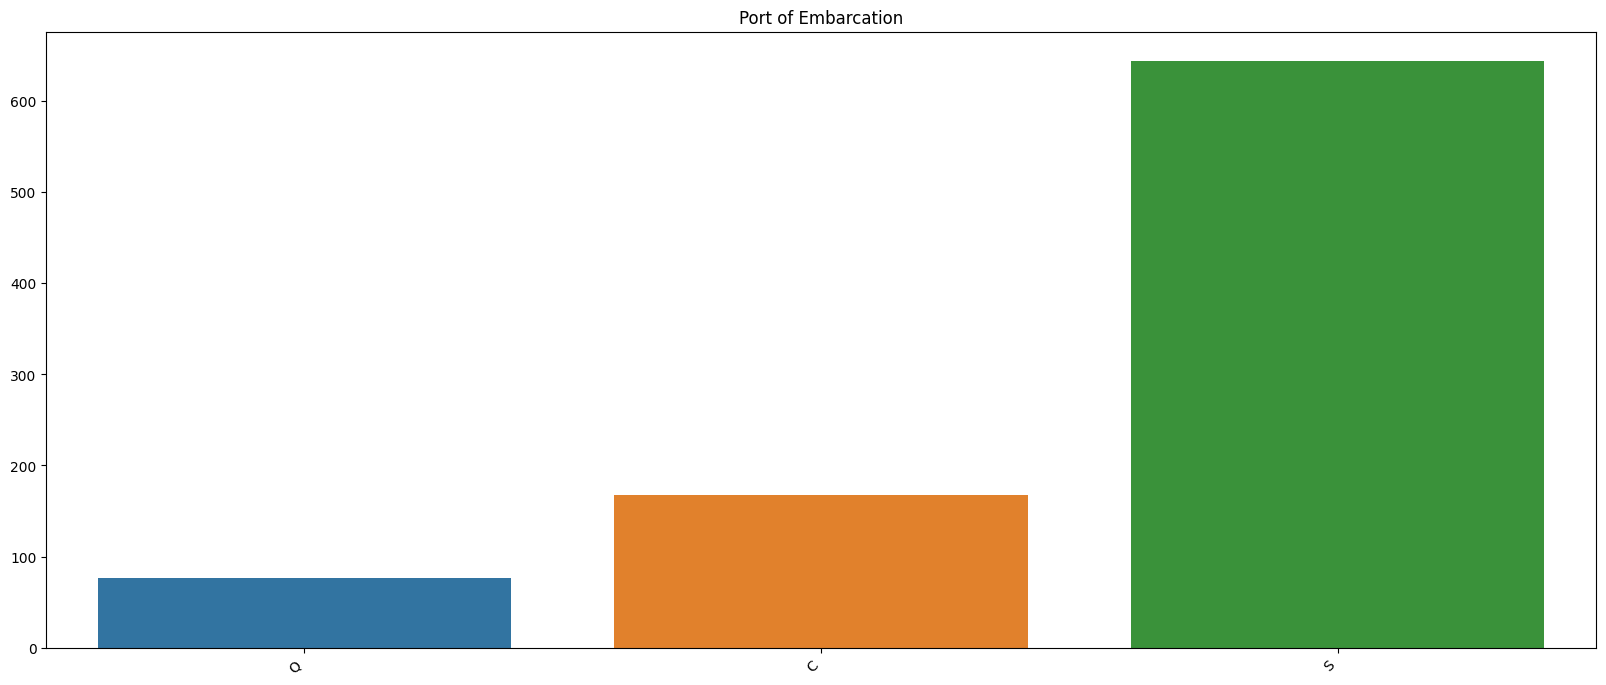

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(x=list(dict(EMB).keys()),y=list(dict(EMB).values()))
plt.xticks(rotation=45, ha='right')
plt.title("Port of Embarcation")
plt.show()

Southampton is the port where the passengers embarked the most. This is logical given that it is from there that the ship departed.

In [17]:
d,e,f=0,0,0
for i in train.Pclass:
    if i==1:
        d+=1
    elif i==2:
        e+=1
    elif i ==3:
        f+=1
Age_rep = [d,e,f]
print("The percentage passengers in class 1 is:",d/len(train.Age-177),'\n',"The percentage of passengers in class 2 is:",e/len(train.Age-177),'\n',"The percentage of passengers in class 3 is:",f/len(train.Age),'\n')

The percentage passengers in class 1 is: 0.24242424242424243 
 The percentage of passengers in class 2 is: 0.20650953984287318 
 The percentage of passengers in class 3 is: 0.5510662177328844 



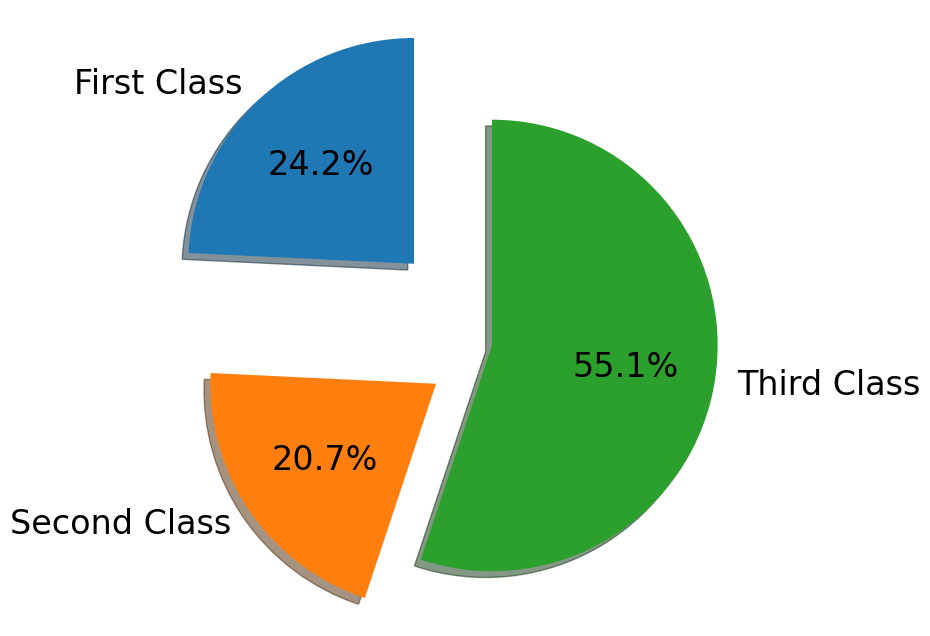

In [18]:
plt.figure(figsize=(10,8))
labels = ['First Class','Second Class','Third Class']
values= Age_rep
explode = [0.5,0.3,0]
#plt.title('Oganisation status',fontdict={'fontsize':34})
pie_org_status = plt.pie(values,labels=labels,startangle=90,explode=explode, textprops={'fontsize':24},autopct='%1.1f%%',shadow=True)  #autopct to specify the percentage needed
plt.axis('equal')
plt.show()

The first class consists of affluent individuals, government officials, owners, and shareholders. The second class is intended for individuals with lower levels of comfort, while the third class accommodates those who are poor, undocumented, or part of the machine crew. Considering the ship's size and the technology available at that time, it is expected that the third class would have a larger number of passengers, as it was under less stringent surveillance.

## Families and classes

In [19]:
Par = train.groupby('Pclass').Parch.value_counts()
Par

Pclass  Parch
1       0        163
        1         31
        2         21
        4          1
2       0        134
        1         32
        2         16
        3          2
3       0        381
        1         55
        2         43
        5          5
        3          3
        4          3
        6          1
Name: count, dtype: int64

Text(0.5, 1.0, 'Passenger class and parent or child ditribution')

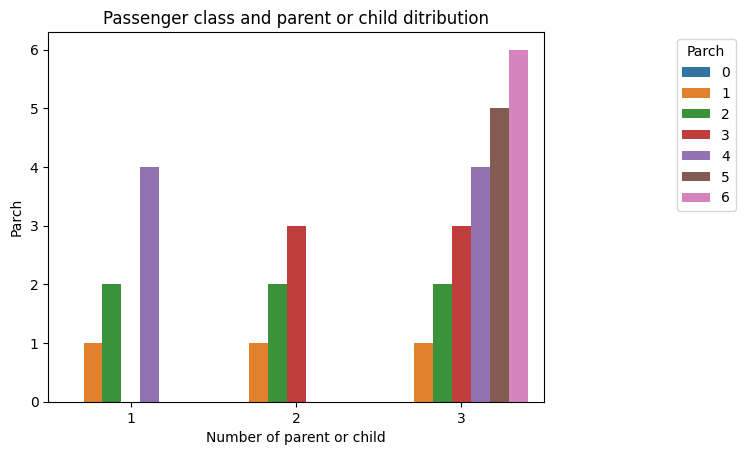

In [20]:
sns.barplot(x = 'Pclass', y = 'Parch', data = train , hue = 'Parch')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', title='Parch')
plt.xlabel('Number of parent or child')
plt.title('Passenger class and parent or child ditribution')

We can clearly see that there the third class contains more parent or child, followed by the first class.

In [21]:
Par = train.groupby('Pclass').SibSp.value_counts()
Par

Pclass  SibSp
1       0        137
        1         71
        2          5
        3          3
2       0        120
        1         55
        2          8
        3          1
3       0        351
        1         83
        4         18
        2         15
        3         12
        8          7
        5          5
Name: count, dtype: int64

Text(0.5, 1.0, 'Passenger class and sibling or spouse')

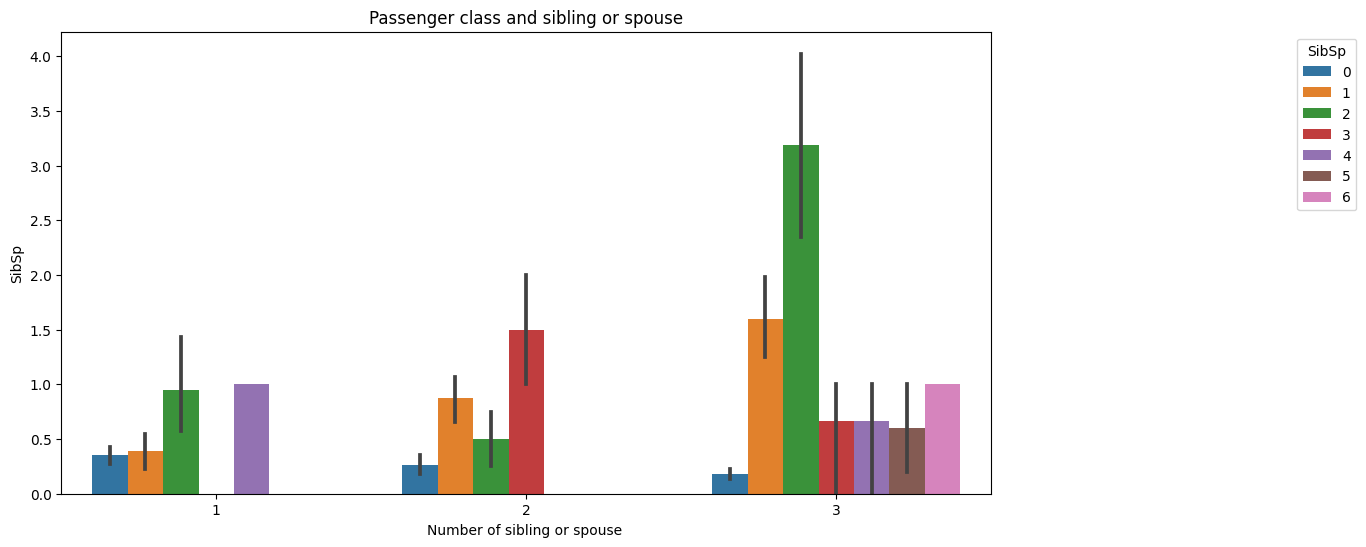

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Pclass', y = 'SibSp', data = train , hue = 'Parch')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', title='SibSp')
plt.xlabel('Number of sibling or spouse ')
plt.title('Passenger class and sibling or spouse')

The above class tells us that the majority of people are as pairs in the ship. It also gives us information about the repartition of sibling and spous among the diffent classes

## Gender, Survival and Age group 

In [23]:
sex = train.groupby('Sex',as_index=False).Survived.value_counts()
sex

,Sex,Survived,count
0,female,1,233
1,female,0,81
2,male,0,468
3,male,1,109


Text(0.5, 1.0, 'Survival and death repartition')

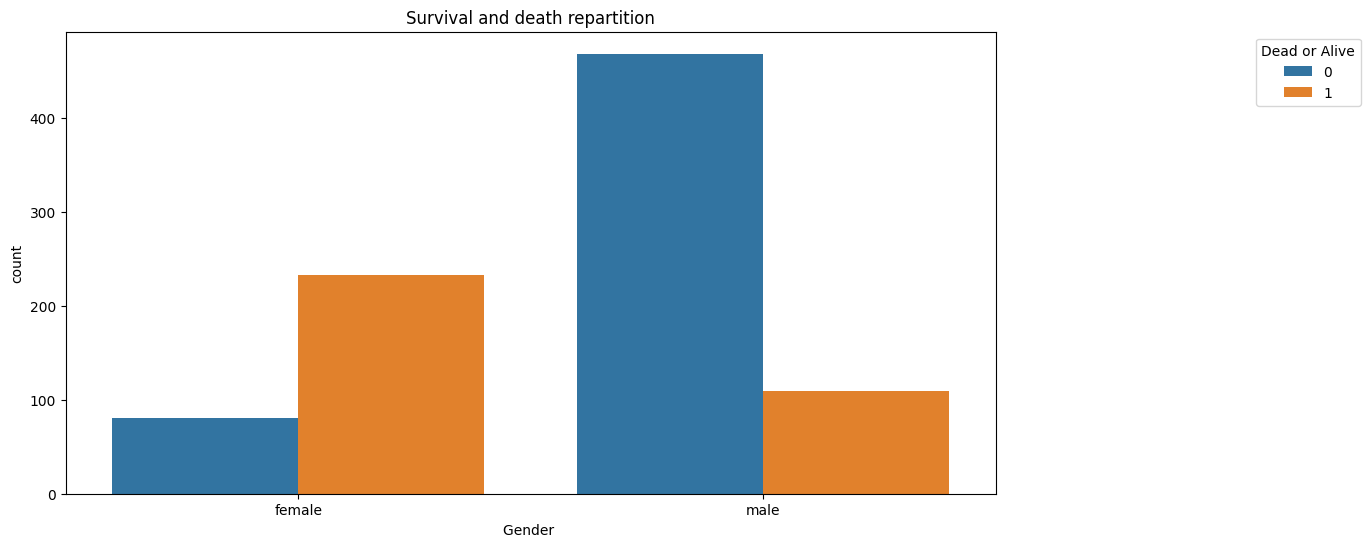

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'Sex', y = 'count', data = sex , hue = 'Survived')
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', title='Dead or Alive')
plt.xlabel('Gender ')
plt.title('Survival and death repartition')

They were obviously more male than female on the ship. Most of the survivals where female. 342 people survived, 68% females and 32% males.

In [25]:
train_sur = train[train.Survived==0]

In [26]:
Age_group = []
for i in train.Age:
    if i<18:
        Age_group.append('Y')
    elif i in range(18,56):
        Age_group.append('A')
    else:
        Age_group.append('O')

In [27]:
train['Age_group'] = np.array(Age_group)

In [28]:
sex = train.groupby('Sex',as_index=False).Survived.value_counts()
sex

,Sex,Survived,count
0,female,1,233
1,female,0,81
2,male,0,468
3,male,1,109


In [29]:
AgeGr_Surv = train.groupby(['Age_group','Survived'],as_index=False).Sex.value_counts()
AgeGr_Surv

,Age_group,Survived,Sex,count
0,A,0,male,393
1,A,0,female,62
2,A,1,female,186
3,A,1,male,82
4,O,0,male,40
5,O,0,female,2
6,O,1,female,9
7,O,1,male,4
8,Y,0,male,35
9,Y,0,female,17


In [31]:
TRAIN = pd.read_csv('/kaggle/input/titanic/train.csv')
TRain = TRAIN[TRAIN.Age.isnull()]
TR_SEX = TRain.groupby("Sex").Survived.value_counts()
TR_SEX

Sex     Survived
female  1            36
        0            17
male    0           108
        1            16
Name: count, dtype: int64

In [32]:
TRAin = TRAIN[~TRAIN.Age.isnull()]
TRAin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
Age_group2 = []
for i in TRAin.Age:
    if i<18:
        Age_group2.append('Y')
    elif i>=18 and i<=55:
        Age_group2.append('A')
    else:
        Age_group2.append('O')

In [34]:
TRAiN = pd.DataFrame(TRAin)

In [35]:
TRAiN['Age_group'] = np.array(Age_group2)

The above table tells us that the majority of men that survived where adults. This is not accurate. Remember that there were 177 missing values in Age that we feed with the mean; this mean made all th missing values to be adults. We later found that among the 177 missing values in age, they are 124 male inside which jus 16 survived. The statistics without the missing values arepresented below

In [37]:
AgeGr_Survi = TRAiN.groupby(['Age_group','Survived'],as_index=False).Sex.value_counts()
AgeGr_Survi

,Age_group,Survived,Sex,count
0,A,0,male,298
1,A,0,female,46
2,A,1,female,151
3,A,1,male,66
4,O,0,male,27
5,O,0,female,1
6,O,1,female,8
7,O,1,male,4
8,Y,0,male,35
9,Y,0,female,17


# 2 - MACHINE LEARNING

The aim now is to used the dataset to design a model able to determine if a passenger survived or not

In [39]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')

In [40]:
 train = train.drop(['Ticket', 'Name','Cabin','Age','PassengerId','Embarked','Fare'], axis=1)

In [41]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
dtype: int64

In [42]:
train.Sex.replace(['male','female'],[0,1],inplace=True)

In [43]:
Y_data = np.array(train.Survived)
Y_data = tf.keras.utils.to_categorical(Y_data)
Y_data

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [44]:
X_data = train.drop("Survived",axis=1)

In [45]:
X_data['Pclass'] = tf.keras.utils.to_categorical(X_data['Pclass'])
X_data['Sex'] = tf.keras.utils.to_categorical(X_data['Sex'])
X_data['Parch'] = tf.keras.utils.to_categorical(X_data['Parch'])
X_data['SibSp'] = tf.keras.utils.to_categorical(X_data['SibSp'])

In [46]:
X_data

,Pclass,Sex,SibSp,Parch
0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,1.0
...,...,...,...,...
886,0.0,1.0,1.0,1.0
887,0.0,0.0,1.0,1.0
888,0.0,0.0,0.0,0.0
889,0.0,1.0,1.0,1.0


In [71]:
X_dat = X_data.values
X_dat

ValueError: could not broadcast input array from shape (9,891) into shape (1,891)